In [1]:
!pip3 install pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.2/809.2 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 29.6 MB/s eta 0:00:00


In [3]:
from collections import Counter
from pymatgen.ext.matproj import MPRester

# Replace with your Materials Project API key
api_key = "QBuRLE3geGypctPx"

# Initialize the MPRester with your API key
mpr = MPRester(api_key)

# Replace with the material ID of SrCeO3 in the Materials Project
material_id = "mp-1069538"  # Example material ID, replace with the correct one

# Fetch the structure from the Materials Project
structure = mpr.get_structure_by_material_id(material_id)

# Extract elements and their fractional coordinates
elements = [site.species_string for site in structure.sites]
positions = [site.frac_coords for site in structure.sites]
atomic_numbers = [site.specie.number for site in structure.sites]

# Determine element C based on its frequency
element_C = max(set(elements), key=elements.count)

# Separate features for A, B, and C atoms
A_features = []
B_features = []
C_features = []

# Find the atomic numbers of elements A and B
element_A_atomic_number = min([atomic_number for atomic_number, element in zip(atomic_numbers, elements) if element != element_C])
element_B_atomic_number = max([atomic_number for atomic_number, element in zip(atomic_numbers, elements) if element != element_C])

# Determine elements A and B based on atomic numbers
element_A = [element for element, atomic_number in zip(elements, atomic_numbers) if atomic_number == element_A_atomic_number][0]
element_B = [element for element, atomic_number in zip(elements, atomic_numbers) if atomic_number == element_B_atomic_number][0]

for i, element in enumerate(elements):
    if element == element_A:
        A_features.extend([atomic_numbers[i], positions[i][0], positions[i][1], positions[i][2]])
    elif element == element_B:
        B_features.extend([atomic_numbers[i], positions[i][0], positions[i][1], positions[i][2]])
    elif element == element_C:
        C_features.extend([atomic_numbers[i], positions[i][0], positions[i][1], positions[i][2]])

# Print the chemical formula of the perovskite
chemical_formula = structure.composition.formula
print("Chemical Formula:", chemical_formula)

# Print the features
print("Features of atom A:", A_features)
print("Features of atom B:", B_features)
print("Features of atom C:", C_features)


Chemical Formula: Cs1 Pb1 I3
Features of atom A: [55, 0.5, 0.5, 0.5]
Features of atom B: [82, 0.0, 0.0, 0.0]
Features of atom C: [53, 0.0, 0.0, 0.5, 53, 0.0, 0.5, 0.0, 53, 0.5, 0.0, 0.0]


In [11]:
from collections import Counter
import numpy as np
import tensorflow as tf
from pymatgen.ext.matproj import MPRester
from pymatgen.core.structure import Structure

# Replace with your Materials Project API key
api_key = "QBuRLE3geGypctPx"

# Initialize the MPRester with your API key
mpr = MPRester(api_key)

# Querying for perovskites of form ABC3 with exactly 5 atoms in the unit cell
criteria = {
    "nelements": 3,
    "anonymous_formula": {"A": 1, "B": 1, "C": 3},
    "nsites": 5
}
properties = ["material_id", "cif"]

perovskite_entries = mpr.query(criteria, properties)

def extract_perovskite_features(structure):
    elements = [site.species_string for site in structure.sites]
    positions = [site.frac_coords for site in structure.sites]
    atomic_numbers = [site.specie.number for site in structure.sites]

    # Determine element C based on its frequency
    element_C = max(set(elements), key=elements.count)

    # Separate features for A, B, and C atoms
    A_features = []
    B_features = []
    C_features = []

    # Find the atomic numbers of elements A and B
    element_A_atomic_number = min([atomic_number for atomic_number, element in zip(atomic_numbers, elements) if element != element_C])
    element_B_atomic_number = max([atomic_number for atomic_number, element in zip(atomic_numbers, elements) if element != element_C])

    # Determine elements A and B based on atomic numbers
    element_A = [element for element, atomic_number in zip(elements, atomic_numbers) if atomic_number == element_A_atomic_number][0]
    element_B = [element for element, atomic_number in zip(elements, atomic_numbers) if atomic_number == element_B_atomic_number][0]

    for i, element in enumerate(elements):
        if element == element_A:
            A_features.extend([atomic_numbers[i], positions[i][0], positions[i][1], positions[i][2]])
        elif element == element_B:
            B_features.extend([atomic_numbers[i], positions[i][0], positions[i][1], positions[i][2]])
        elif element == element_C:
            C_features.extend([atomic_numbers[i], positions[i][0], positions[i][1], positions[i][2]])

    return A_features, B_features, C_features

# Process each entry
for entry in perovskite_entries:
    cif_str = entry['cif']
    structure = Structure.from_str(cif_str, fmt='cif')

    A_features, B_features, C_features = extract_perovskite_features(structure)

    # Print the chemical formula of the perovskite
    chemical_formula = structure.composition.formula
    print("Chemical Formula:", chemical_formula)
    print("Features of atom A:", A_features)
    print("Features of atom B:", B_features)
    print("Features of atom C:", C_features)
    print("")



/usr/local/lib/python3.10/dist-packages/pymatgen/ext/matproj_legacy.py:168: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(
100%|██████████| 1720/1720 [00:00<00:00, 2073.26it/s]


Chemical Formula: Ca1 Fe1 O3
Features of atom A: [20, 0.5, 0.5, 0.5]
Features of atom B: [26, 0.0, 0.0, 0.0]
Features of atom C: [8, 0.5, 0.0, 0.0, 8, 0.0, 0.5, 0.0, 8, 0.0, 0.0, 0.5]

Chemical Formula: Ce3 Al1 C1
Features of atom A: [6, 0.5, 0.5, 0.5]
Features of atom B: [13, 0.0, 0.0, 0.0]
Features of atom C: [58, 0.0, 0.5, 0.5, 58, 0.5, 0.0, 0.5, 58, 0.5, 0.5, 0.0]

Chemical Formula: Al1 Co3 C1
Features of atom A: [6, 0.5, 0.5, 0.5]
Features of atom B: [13, 0.0, 0.0, 0.0]
Features of atom C: [27, 0.0, 0.5, 0.5, 27, 0.5, 0.0, 0.5, 27, 0.5, 0.5, 0.0]

Chemical Formula: Pr3 Al1 C1
Features of atom A: [6, 0.5, 0.5, 0.5]
Features of atom B: [13, 0.0, 0.0, 0.0]
Features of atom C: [59, 0.5, 0.5, 0.0, 59, 0.5, 0.0, 0.5, 59, 0.0, 0.5, 0.5]

Chemical Formula: Al1 Pt3 C1
Features of atom A: [6, 0.5, 0.5, 0.5]
Features of atom B: [13, 0.0, 0.0, 0.0]
Features of atom C: [78, 0.0, 0.5, 0.5, 78, 0.5, 0.0, 0.5, 78, 0.5, 0.5, 0.0]

Chemical Formula: H1 Pb1 I3
Features of atom A: [1, 0.5, 0.5, 0.5]


/usr/local/lib/python3.10/dist-packages/pymatgen/io/cif.py:1307: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))



Chemical Formula: V3 Au1 N1
Features of atom A: [7, 0.0, 0.0, 0.0]
Features of atom B: [79, 0.5, 0.5, 0.5]
Features of atom C: [23, 0.0, 0.5, 0.5, 23, 0.5, 0.5, 0.0, 23, 0.5, 0.0, 0.5]

Chemical Formula: Cs1 Ge1 I3
Features of atom A: [32, 0.629047, 0.629047, 0.116469]
Features of atom B: [55, 0.084652, 0.084652, 0.58376]
Features of atom C: [53, 0.570202, 0.570202, 0.592011, 53, 0.620903, 0.071196, 0.09788, 53, 0.071196, 0.620903, 0.09788]

Chemical Formula: Cs1 Ge1 Br3
Features of atom A: [32, 0.630918, 0.630918, 0.129674]
Features of atom B: [55, 0.101017, 0.101017, 0.593461]
Features of atom C: [35, 0.591207, 0.591207, 0.578355, 35, 0.615666, 0.075392, 0.102805, 35, 0.075392, 0.615666, 0.102805]

Chemical Formula: Eu1 H3 Pd1
Features of atom A: [46, 0.0, 0.0, 0.0]
Features of atom B: [63, 0.5, 0.5, 0.5]
Features of atom C: [1, 0.0, 0.0, 0.5, 1, 0.0, 0.5, 0.0, 1, 0.5, 0.0, 0.0]

Chemical Formula: Ba1 Ti1 O3
Features of atom A: [22, 0.105801, 0.105801, 0.5]
Features of atom B: [56, 

/usr/local/lib/python3.10/dist-packages/pymatgen/io/cif.py:1307: UserWarning: Issues encountered while parsing CIF: 6 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


Chemical Formula: Sc3 Sn1 C1
Features of atom A: [6, 0.5, 0.5, 0.5]
Features of atom B: [50, 0.0, 0.0, 0.0]
Features of atom C: [21, 0.0, 0.5, 0.5, 21, 0.5, 0.5, 0.0, 21, 0.5, 0.0, 0.5]

Chemical Formula: Sm1 Cr1 O3
Features of atom A: [24, 0.0, 0.0, 0.0]
Features of atom B: [62, 0.5, 0.5, 0.5]
Features of atom C: [8, 0.5, 0.0, 0.0, 8, 0.0, 0.5, 0.0, 8, 0.0, 0.0, 0.5]

Chemical Formula: Na1 W1 O3
Features of atom A: [11, 0.5, 0.5, 0.5]
Features of atom B: [74, 0.0, 0.0, 0.0]
Features of atom C: [8, 0.5, 0.0, 0.0, 8, 0.0, 0.5, 0.0, 8, 0.0, 0.0, 0.5]

Chemical Formula: Pr3 In1 C1
Features of atom A: [6, 0.0, 0.0, 0.0]
Features of atom B: [49, 0.5, 0.5, 0.5]
Features of atom C: [59, 0.5, 0.0, 0.5, 59, 0.5, 0.5, 0.0, 59, 0.0, 0.5, 0.5]

Chemical Formula: Dy3 Pb1 C1
Features of atom A: [6, 0.5, 0.5, 0.5]
Features of atom B: [82, 0.0, 0.0, 0.0]
Features of atom C: [66, 0.5, 0.0, 0.5, 66, 0.0, 0.5, 0.5, 66, 0.5, 0.5, 0.0]

Chemical Formula: Sr3 Pb1 O1
Features of atom A: [8, 0.5, 0.5, 0.5]
Fe

In [15]:
from collections import Counter
import numpy as np
import tensorflow as tf
from pymatgen.ext.matproj import MPRester

api_key = "QBuRLE3geGypctPx"

mpr = MPRester(api_key)

criteria = {
    "nelements": 3,
    "anonymous_formula": {"A": 1, "B": 1, "C": 3},
    "nsites": 5
}
perovskite_entries = mpr.query(criteria, ['material_id', 'cif','spacegroup','band_gap','formation_energy_per_atom'])

def extract_perovskite_features(structure):
    elements = [site.species_string for site in structure.sites]
    positions = [site.frac_coords for site in structure.sites]
    atomic_numbers = [site.specie.number for site in structure.sites]


    element_C = max(set(elements), key=elements.count)


    A_features = []
    B_features = []
    C_features = []


    element_A_atomic_number = min([atomic_number for atomic_number, element in zip(atomic_numbers, elements) if element != element_C])
    element_B_atomic_number = max([atomic_number for atomic_number, element in zip(atomic_numbers, elements) if element != element_C])


    element_A = [element for element, atomic_number in zip(elements, atomic_numbers) if atomic_number == element_A_atomic_number][0]
    element_B = [element for element, atomic_number in zip(elements, atomic_numbers) if atomic_number == element_B_atomic_number][0]

    for i, element in enumerate(elements):
        if element == element_A:
            A_features.extend([atomic_numbers[i], positions[i][0], positions[i][1], positions[i][2]])
        elif element == element_B:
            B_features.extend([atomic_numbers[i], positions[i][0], positions[i][1], positions[i][2]])
        elif element == element_C:
            C_features.extend([atomic_numbers[i], positions[i][0], positions[i][1], positions[i][2]])

    lattice = structure.lattice
    lattice_features = [lattice.a, lattice.b, lattice.c, lattice.alpha, lattice.beta, lattice.gamma, lattice.volume]

    density = structure.density
    band_gap = entry.get('band_gap', 0.0)
    formation_energy = entry.get('formation_energy_per_atom', 0.0)


    features = A_features + B_features + C_features + lattice_features + [density, band_gap, formation_energy]

    return np.array(features)


all_features = []

for entry in perovskite_entries:
    cif_str = entry['cif']
    structure = Structure.from_str(cif_str, fmt='cif')
    features = extract_perovskite_features(structure)
    all_features.append(features)

perovskite_features = np.array(all_features)


min_values = np.min(perovskite_features, axis=0)
max_values = np.max(perovskite_features, axis=0)
normalized_features = (perovskite_features - min_values) / (max_values - min_values + 1e-6)

all_tensors = []

for features in normalized_features:

    features_matrix = np.tile(features.reshape((30, 1)), (1, 2))

    tensor = tf.convert_to_tensor(features_matrix, dtype=tf.float32)
    all_tensors.append(tensor)

training_set = tf.stack(all_tensors)

print("Training set shape:", training_set.shape)

100%|██████████| 1720/1720 [00:00<00:00, 1737.57it/s]


Training set shape: (1720, 30, 2)


With Regularization

#######

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split

num_samples = training_set.shape[0]
input_dim = 30 * 2
training_set = tf.reshape(training_set, (num_samples, input_dim))

latent_dim = 4

# Encoder
inputs = Input(shape=(input_dim,))
h = Dense(128, activation='relu')(inputs)
h = Dense(64, activation='relu')(h)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# Reparameterization
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.0, stddev=1.0)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling)([z_mean, z_log_var])

# Decoder
decoder_input = Input(shape=(latent_dim,))
h_decoded = Dense(64, activation='relu')(decoder_input)
h_decoded = Dense(128, activation='relu')(h_decoded)
x_decoded_mean = Dense(input_dim, activation='sigmoid')(h_decoded)

decoder = Model(decoder_input, x_decoded_mean)
x_decoded = decoder(z)

vae = Model(inputs, x_decoded)

reconstruction_loss = MeanSquaredError()(inputs, x_decoded)
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer=Adam(learning_rate=0.0001))

# Training the VAE
history = vae.fit(training_set, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
43/43 [==============================] - 2s 9ms/step - loss: 0.1436 - val_loss: 0.1184
Epoch 2/50
43/43 [==============================] - 0s 4ms/step - loss: 0.1094 - val_loss: 0.1044
Epoch 3/50
43/43 [==============================] - 0s 5ms/step - loss: 0.0977 - val_loss: 0.0930
Epoch 4/50
43/43 [==============================] - 0s 7ms/step - loss: 0.0864 - val_loss: 0.0820
Epoch 5/50
43/43 [==============================] - 0s 7ms/step - loss: 0.0765 - val_loss: 0.0720
Epoch 6/50
43/43 [==============================] - 0s 7ms/step - loss: 0.0675 - val_loss: 0.0638
Epoch 7/50
43/43 [==============================] - 0s 6ms/step - loss: 0.0609 - val_loss: 0.0594
Epoch 8/50
43/43 [==============================] - 0s 6ms/step - loss: 0.0575 - val_loss: 0.0564
Epoch 9/50
43/43 [==============================] - 0s 8ms/step - loss: 0.0553 - val_loss: 0.0551
Epoch 10/50
43/43 [==============================] - 0s 8ms/step - loss: 0.0539 - val_loss: 0.0545
Epoch 11/50
43/43 [

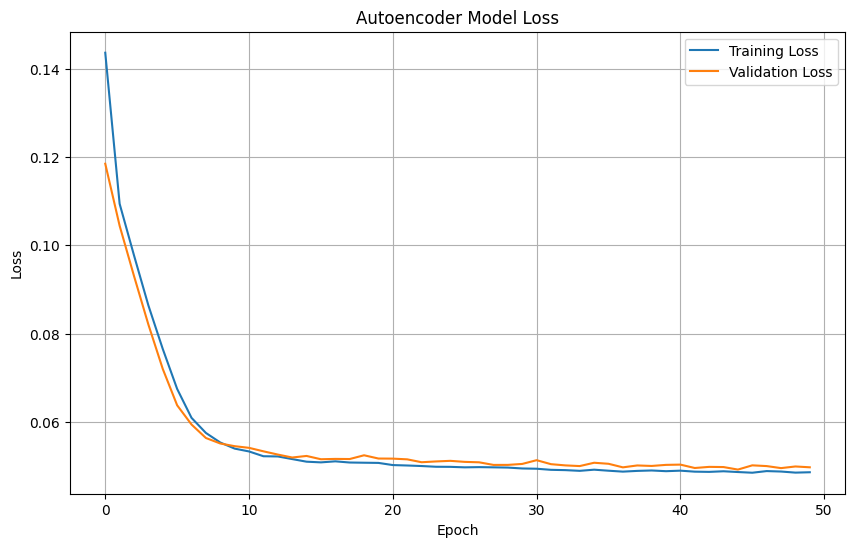

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [18]:
encoder = Model(inputs, z_mean)
encoded_data = encoder.predict(training_set)

encoded_sample = np.random.normal(size=(1, latent_dim))
decoded_sample = decoder.predict(encoded_sample)
decoded_sample = tf.reshape(decoded_sample, (30, 2))

print("Sample from the latent space, reshaped to (28, 2):")
print(decoded_sample)

1/1 [==============================] - 0s 66ms/step
Sample from the latent space, reshaped to (28, 2):
tf.Tensor(
[[0.27787745 0.2775228 ]
 [0.28648233 0.2732029 ]
 [0.28782454 0.31094185]
 [0.29154623 0.25744957]
 [0.5886782  0.5964651 ]
 [0.22339122 0.20923983]
 [0.23573966 0.23717315]
 [0.17779456 0.19124724]
 [0.2021825  0.21941207]
 [0.3310634  0.35811433]
 [0.3660324  0.3644871 ]
 [0.14356531 0.16753258]
 [0.21394892 0.20796005]
 [0.39050096 0.37382546]
 [0.19109736 0.20856608]
 [0.34705472 0.33229706]
 [0.1962362  0.18029392]
 [0.21476044 0.17636399]
 [0.33791587 0.33380702]
 [0.36545327 0.35442176]
 [0.08171797 0.0702287 ]
 [0.06509516 0.08177033]
 [0.08392809 0.09881345]
 [0.5478415  0.5398159 ]
 [0.5331081  0.54921085]
 [0.6237318  0.6123436 ]
 [0.00992224 0.00995718]
 [0.37991208 0.38185197]
 [0.02692259 0.02086955]
 [0.36372915 0.35176006]], shape=(30, 2), dtype=float32)


In [19]:
periodic_table = {
    1: 'H', 2: 'He', 3: 'Li', 4: 'Be', 5: 'B', 6: 'C', 7: 'N', 8: 'O', 9: 'F', 10: 'Ne',
    11: 'Na', 12: 'Mg', 13: 'Al', 14: 'Si', 15: 'P', 16: 'S', 17: 'Cl', 18: 'Ar', 19: 'K', 20: 'Ca',
    21: 'Sc', 22: 'Ti', 23: 'V', 24: 'Cr', 25: 'Mn', 26: 'Fe', 27: 'Co', 28: 'Ni', 29: 'Cu', 30: 'Zn',
    31: 'Ga', 32: 'Ge', 33: 'As', 34: 'Se', 35: 'Br', 36: 'Kr', 37: 'Rb', 38: 'Sr', 39: 'Y', 40: 'Zr',
    41: 'Nb', 42: 'Mo', 43: 'Tc', 44: 'Ru', 45: 'Rh', 46: 'Pd', 47: 'Ag', 48: 'Cd', 49: 'In', 50: 'Sn',
    51: 'Sb', 52: 'Te', 53: 'I', 54: 'Xe', 55: 'Cs', 56: 'Ba', 57: 'La', 58: 'Ce', 59: 'Pr', 60: 'Nd',
    61: 'Pm', 62: 'Sm', 63: 'Eu', 64: 'Gd', 65: 'Tb', 66: 'Dy', 67: 'Ho', 68: 'Er', 69: 'Tm', 70: 'Yb',
    71: 'Lu', 72: 'Hf', 73: 'Ta', 74: 'W', 75: 'Re', 76: 'Os', 77: 'Ir', 78: 'Pt', 79: 'Au', 80: 'Hg',
    81: 'Tl', 82: 'Pb', 83: 'Bi', 84: 'Po', 85: 'At', 86: 'Rn', 87: 'Fr', 88: 'Ra', 89: 'Ac', 90: 'Th',
    91: 'Pa', 92: 'U', 93: 'Np', 94: 'Pu', 95: 'Am', 96: 'Cm', 97: 'Bk', 98: 'Cf', 99: 'Es', 100: 'Fm',
    101: 'Md', 102: 'No', 103: 'Lr', 104: 'Rf', 105: 'Db', 106: 'Sg', 107: 'Bh', 108: 'Hs', 109: 'Mt',
    110: 'Ds', 111: 'Rg', 112: 'Cn', 113: 'Nh', 114: 'Fl', 115: 'Mc', 116: 'Lv', 117: 'Ts', 118: 'Og'
}



In [23]:
min_values_broadcasted = np.repeat(min_values[:, np.newaxis], decoded_sample.shape[1], axis=1)
max_values_broadcasted = np.repeat(max_values[:, np.newaxis], decoded_sample.shape[1], axis=1)

# Reverse Min-max normalization to obtain original scale values
original_scale_values = decoded_sample * (max_values_broadcasted - min_values_broadcasted) + min_values_broadcasted

# Print all the feature values in their original scale
print("Decoded Sample Features in Original Scale:")
for feature_index, (value1, value2) in enumerate(original_scale_values):
    value1_np = value1.numpy()
    value2_np = value2.numpy()

    if feature_index in [0, 4, 8]:  # Indices 0, 4, 8 correspond to features 1, 5, 9 respectively
        atomic_number = int(round(value1_np))
        if atomic_number in periodic_table:
          if feature_index in [0]:
            atom_name = periodic_table[atomic_number]
            print(f"Feature {feature_index + 1}: Atomic_Number of A: {(value1_np+value2_np)/2}, Atom: {atom_name}")
          elif feature_index in [4]:
            atom_name = periodic_table[atomic_number]
            print(f"Feature {feature_index + 1}: Atomic_Number of B: {(value1_np+value2_np)/2}, Atom: {atom_name}")
          elif feature_index in [8,12,16]:
            print(f"Feature {feature_index + 1}: Atomic_Number of C: {(value1_np+value2_np)/2}, Atom: {atom_name}")


    elif feature_index in [27]:
      print(f"Feature {feature_index + 1}: Formation_energy_per_atom: {(value1_np+value2_np)/2}")
    elif feature_index in [25]:
      print(f"Feature {feature_index + 1}: Density: {(value1_np+value2_np)/2}")
    elif feature_index in [26]:
      print(f"Feature {feature_index + 1}: Band_gap: {(value1_np+value2_np)/2}")
    elif feature_index in [24]:
      print(f"Feature {feature_index + 1}: Volume: {(value1_np+value2_np)/2}")
    elif feature_index in [1,5,9,13,17]:
      print(f"Feature {feature_index + 1}: Atomic_Position_x: {(value1_np+value2_np)/2}")
    elif feature_index in [2,6,10,14,18]:
      print(f"Feature {feature_index + 1}: Atomic_Position_y: {(value1_np+value2_np)/2}")
    elif feature_index in [3,7,11,15,19]:
      print(f"Feature {feature_index + 1}: Atomic_Position_z: {(value1_np+value2_np)/2}")
    elif feature_index in [20]:
      print(f"Feature {feature_index + 1}: lattice parameter_a: {(value1_np+value2_np)/2}")
    elif feature_index in [21]:
      print(f"Feature {feature_index + 1}: Lattice parameter_b: {(value1_np+value2_np)/2}")
    elif feature_index in [22]:
      print(f"Feature {feature_index + 1}: Lattice parameter_c: {(value1_np+value2_np)/2}")
    elif feature_index in [23]:
      print(f"Feature {feature_index + 1}: Alpha: {(value1_np+value2_np)/2}")
    elif feature_index in [24]:
      print(f"Feature {feature_index + 1}: Beta: {(value1_np+value2_np)/2}")
    elif feature_index in [25]:
      print(f"Feature {feature_index + 1}: Gamma: {(value1_np+value2_np)/2}")
    else:
      print(f"Feature {feature_index + 1}: Average_value: {(value1_np+value2_np)/2}")

Decoded Sample Features in Original Scale:
Feature 1: Atomic_Number of A: 23.493709564208984, Atom: Cr
Feature 2: Atomic_Position_x: 0.2798277735710144
Feature 3: Atomic_Position_y: 0.2993673086166382
Feature 4: Atomic_Position_z: 0.2744443416595459
Feature 5: Atomic_Number of B: 57.331451416015625, Atom: La
Feature 6: Atomic_Position_x: 0.2163127064704895
Feature 7: Atomic_Position_y: 0.23645523190498352
Feature 8: Atomic_Position_z: 0.18452072143554688
Feature 9: Atomic_Number of C: 17.442188262939453, Atom: La
Feature 10: Atomic_Position_x: 0.34455060958862305
Feature 11: Atomic_Position_y: 0.36512380838394165
Feature 12: Atomic_Position_z: 0.15545311570167542
Feature 13: Average_value: 17.454448699951172
Feature 14: Atomic_Position_x: 0.3819277882575989
Feature 15: Atomic_Position_y: 0.19983132183551788
Feature 16: Atomic_Position_z: 0.3356530964374542
Feature 17: Average_value: 15.684674263000488
Feature 18: Atomic_Position_x: 0.19546912610530853
Feature 19: Atomic_Position_y: 0.3

In [24]:
# Repeat min_values and max_values along the second axis to match the shape of decoded_sample
min_values_broadcasted = np.repeat(min_values[:, np.newaxis], decoded_sample.shape[1], axis=1)
max_values_broadcasted = np.repeat(max_values[:, np.newaxis], decoded_sample.shape[1], axis=1)

# Reverse Min-max normalization to obtain original scale values
original_scale_values = decoded_sample * (max_values_broadcasted - min_values_broadcasted) + min_values_broadcasted

# Print all the feature values in their original scale
print("Decoded Sample Features in Original Scale:")
for feature_index, (value1, value2) in enumerate(original_scale_values):
    value1_np = value1.numpy()  # Convert to NumPy array
    value2_np = value2.numpy()  # Convert to NumPy array

    if feature_index in [0, 4, 8]:  # Indices 0, 4, 8 correspond to features 1, 5, 9 respectively
        atomic_number1 = int(round(value1_np))
        atomic_number2 = int(round(value2_np))
        atom_name1 = periodic_table[atomic_number1]
        atom_name2 = periodic_table[atomic_number2]
        print(f"Feature {feature_index + 1}: Value 1: {value1_np}, Value 2: {value2_np}, Atom_1: {atom_name1}, Atom_2: {atom_name2}")
    else:
        print(f"Feature {feature_index + 1}: Value 1: {value1_np}, Value 2: {value2_np}")

Decoded Sample Features in Original Scale:
Feature 1: Value 1: 23.508073806762695, Value 2: 23.479347229003906, Atom_1: Cr, Atom_2: V
Feature 2: Value 1: 0.28646716475486755, Value 2: 0.27318841218948364
Feature 3: Value 1: 0.287809282541275, Value 2: 0.31092536449432373
Feature 4: Value 1: 0.2914893627166748, Value 2: 0.2573993504047394
Feature 5: Value 1: 56.98103713989258, Value 2: 57.681861877441406, Atom_1: La, Atom_2: Ce
Feature 6: Value 1: 0.22338831424713135, Value 2: 0.20923711359500885
Feature 7: Value 1: 0.23573848605155945, Value 2: 0.2371719628572464
Feature 8: Value 1: 0.17779438197612762, Value 2: 0.19124704599380493
Feature 9: Value 1: 16.770235061645508, Value 2: 18.1141414642334, Atom_1: Cl, Atom_2: Ar
Feature 10: Value 1: 0.3310266435146332, Value 2: 0.3580745756626129
Feature 11: Value 1: 0.3658961355686188, Value 2: 0.36435145139694214
Feature 12: Value 1: 0.14347687363624573, Value 2: 0.1674293726682663
Feature 13: Value 1: 17.68801498413086, Value 2: 17.220884323

In [25]:
# Repeat min_values and max_values along the second axis to match the shape of decoded_sample
min_values_broadcasted = np.repeat(min_values[:, np.newaxis], decoded_sample.shape[1], axis=1)
max_values_broadcasted = np.repeat(max_values[:, np.newaxis], decoded_sample.shape[1], axis=1)

# Reverse Min-max normalization to obtain original scale values
original_scale_values = decoded_sample * (max_values_broadcasted - min_values_broadcasted) + min_values_broadcasted

print("decoded_sample features in original scale:")
for feature_index, (value1, value2) in enumerate(original_scale_values):
    print(f"Feature {feature_index + 1}: Average Value: {(value1+value2)/2}")

decoded_sample features in original scale:
Feature 1: Average Value: 23.493709564208984
Feature 2: Average Value: 0.2798277735710144
Feature 3: Average Value: 0.2993673086166382
Feature 4: Average Value: 0.2744443416595459
Feature 5: Average Value: 57.331451416015625
Feature 6: Average Value: 0.2163127064704895
Feature 7: Average Value: 0.23645523190498352
Feature 8: Average Value: 0.18452072143554688
Feature 9: Average Value: 17.442188262939453
Feature 10: Average Value: 0.34455060958862305
Feature 11: Average Value: 0.36512380838394165
Feature 12: Average Value: 0.15545311570167542
Feature 13: Average Value: 17.454448699951172
Feature 14: Average Value: 0.3819277882575989
Feature 15: Average Value: 0.19983132183551788
Feature 16: Average Value: 0.3356530964374542
Feature 17: Average Value: 15.684674263000488
Feature 18: Average Value: 0.19546912610530853
Feature 19: Average Value: 0.335824191570282
Feature 20: Average Value: 0.35993534326553345
Feature 21: Average Value: 4.1115541458